#AI-Powered Customer Loyalty Analysis

#Project Description:
This project harnesses machine learning to analyze customer behavior and predict churn in the telecom industry. Using advanced data preprocessing, feature engineering, and classification models, it identifies patterns that signal potential customer loss. Businesses can leverage these insights to proactively enhance customer satisfaction and improve retention strategies.

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [109]:
df_first_3000 = pd.read_csv('/content/df_first_3000.csv')
df_second_2000 = pd.read_csv('/content/df_second_2000.csv')
df_last_2000 = pd.read_csv('/content/df_last_2000.csv')

In [110]:
print(df_first_3000.info())
print(df_second_2000.info())
print(df_last_2000.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [111]:
print("Missing values before cleanup:")
print(df_first_3000.isnull().sum())

Missing values before cleanup:
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64


In [112]:
df_first_3000 = df_first_3000.dropna(subset=['MultipleLines', 'TotalCharges', 'Churn'])

In [113]:
cols_to_fill = ["OnlineSecurity", "OnlineBackup", "DeviceProtection",
                "TechSupport", "StreamingTV", "StreamingMovies"]
df_first_3000[cols_to_fill] = df_first_3000[cols_to_fill].fillna("No internet service")

In [114]:
df_second_2000['TotalCharges'] = pd.to_numeric(df_second_2000['TotalCharges'], errors='coerce')
df_last_2000['TotalCharges'] = pd.to_numeric(df_last_2000['TotalCharges'], errors='coerce')

In [115]:
train = pd.concat([df_first_3000, df_last_2000])
test = df_second_2000.copy()

In [116]:
train['SeniorCitizen'] = train['SeniorCitizen'].astype(str)
test['SeniorCitizen'] = test['SeniorCitizen'].astype(str)

In [117]:
X = train.drop(['customerID', 'Churn'], axis=1)
y = train['Churn'].astype(str)

In [118]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [119]:
def preprocess_data(df):
    """Handles categorical encoding, scaling, and missing values."""

    if not isinstance(df, pd.DataFrame):
        df = pd.DataFrame(df)

    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    # Convert categorical columns to string before encoding
    df[categorical_cols] = df[categorical_cols].astype(str)

    # Handle missing values
    imputer_num = SimpleImputer(strategy="mean")  # Fill numeric NaNs with mean
    imputer_cat = SimpleImputer(strategy="most_frequent")  # Fill categorical NaNs with mode

    df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])
    df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

    # Define transformations
    preprocessor = ColumnTransformer([
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('scaler', StandardScaler(), numerical_cols)
    ])

    transformed = preprocessor.fit_transform(df)

    # Ensure output is a dense NumPy array
    return transformed.toarray() if hasattr(transformed, "toarray") else transformed

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [121]:
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

In [122]:
print("Missing values in X_train after preprocessing:", np.isnan(X_train).sum())
print("Missing values in X_test after preprocessing:", np.isnan(X_test).sum())

Missing values in X_train after preprocessing: 0
Missing values in X_test after preprocessing: 0


In [123]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [124]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

In [125]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Ensure dense input
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

Logistic Regression Accuracy: 0.80
Random Forest Accuracy: 0.77
Support Vector Machine Accuracy: 0.80
Decision Tree Accuracy: 0.73


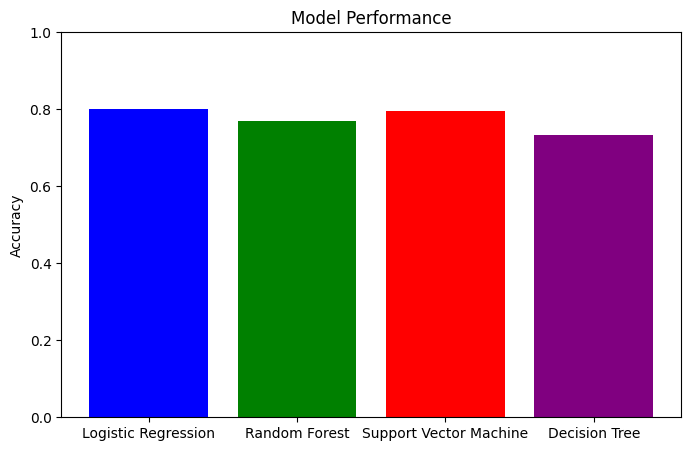

In [126]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylabel("Accuracy")
plt.title("Model Performance")
plt.ylim(0, 1)
plt.show()